In [1]:
import numpy as np
from skimage.io import imread
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.callbacks import History

In [2]:
## read all the images first
x_train = []
for i in range(1, 5):
    base_dir = rf"C:\Users\maxim\OneDrive\Desktop\cancer_data\stage_{i}_png/"
    files = os.listdir(base_dir)
    for file in tqdm(files):
        img = imread(base_dir+file)
        x_train.append(img)
x_train = np.array(x_train)
x_train.shape

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 497.76it/s]


(1000, 512, 512)

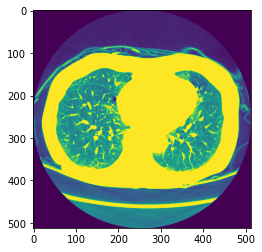

In [23]:
plt.imshow(x_train[500])

In [13]:
NUM = 250
CLASSES = 4
y_train = []
class_label = 0
for i in range(NUM*CLASSES):
    if i > 0 and i %  NUM == 0:
        class_label += 1
    y_train.append(class_label)
y_train = np.array(y_train)

In [14]:
# shuffle training data
shuffler = np.random.permutation(NUM*CLASSES)
x_train = x_train[shuffler]
y_train = y_train[shuffler]

In [15]:
# make training and testing data
NUM_TRAIN =int(NUM*CLASSES*0.85)
x_test = x_train[NUM_TRAIN:]
y_test = y_train[NUM_TRAIN:]
x_train = x_train[:NUM_TRAIN]
y_train = y_train[:NUM_TRAIN]

In [16]:
x_train[0].shape

(512, 512)

In [17]:
# flatten 
x_train_flattened = x_train.reshape(len(x_train), x_train[0].shape[0] * x_train[0].shape[1])
x_test_flattened = x_test.reshape(len(x_test), x_test[0].shape[0] * x_test[0].shape[1])

In [28]:
history = History()
model = keras.Sequential([
    keras.layers.Dense(2000, input_shape=(512*512,), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10, callbacks=[history])

Epoch 1/10
27/27 [==============================] - 49s 2s/step - loss: 41828.1172 - accuracy: 0.5200
Epoch 2/10
27/27 [==============================] - 47s 2s/step - loss: 450.8336 - accuracy: 0.9565
Epoch 3/10
27/27 [==============================] - 47s 2s/step - loss: 1.0064 - accuracy: 0.9988
Epoch 4/10
27/27 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 45s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
27/27 [==============================] - 45s 2s/step - loss: 0.0000e+00 - ac

In [51]:
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(512*512,), activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10, callbacks=[history])

Epoch 1/10
27/27 [==============================] - 5s 162ms/step - loss: 27339.0078 - accuracy: 0.6271
Epoch 2/10
27/27 [==============================] - 4s 160ms/step - loss: 48.9627 - accuracy: 0.9800
Epoch 3/10
27/27 [==============================] - 4s 162ms/step - loss: 1.0156 - accuracy: 0.9988
Epoch 4/10
27/27 [==============================] - 5s 169ms/step - loss: 2.6521 - accuracy: 0.9976
Epoch 5/10
27/27 [==============================] - 4s 161ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 5s 168ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 5s 169ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 5s 168ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 5s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
27/27 [==============================] - 4s 165ms/step - loss: 